<a href="https://colab.research.google.com/github/FaragoFa/Materia-de-aprendizaje/blob/master/Segmentacion_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segmentacion de clientes

En primer lugar, se carga el dataset y se muestra su composicion

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [242]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [243]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Como se puede ver, el dataset tiene las medias de los atributos en distintas magnitudes. Por esto es conveniente normalizar los mismos

In [244]:
from sklearn.preprocessing import scale
df_norm = (df-df.min())/(df.max()-df.min())
df_norm
x= scale (df)

In [245]:
df_norm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


In [247]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)


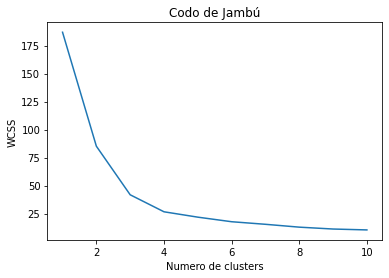

In [248]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")
plt.show()

De la grafica se puede observar que un valor optimo para el K es 3 o 4 ya que si es mayor, el sistema sera muy especifico

In [249]:
clustering = KMeans(n_clusters = 3, max_iter = 300)
clustering.fit(df_norm)

KMeans(n_clusters=3)

Ahora, se agregan los clusters al data set original


In [250]:
df['KMeans_Clusters'] = clustering.labels_  #Los resultados del clustering se guardan en Labels_ dentro del modelo
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


Flinalmente, para visualizar los clusters, se aplicara el analisis de componentes principales 

In [251]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pca.fit_transform(df_norm)
pca_pd = pd.DataFrame(data = pca_df, columns = ['Componente_1','Componente_2'])
pca_nombres_pd = pd.concat([pca_pd,df['KMeans_Clusters']],axis =1)
pca_nombres_pd

,Componente_1,Componente_2,KMeans_Clusters
0,0.686162,-0.143443,0
1,0.692978,-0.141117,0
2,0.690638,-0.142219,0
3,-0.304239,-0.270145,1
4,0.671296,-0.148007,0
...,...,...,...
435,-0.281904,-0.269205,1
436,-0.318431,-0.277468,1
437,0.775946,-0.125801,0
438,-0.303409,-0.269974,1


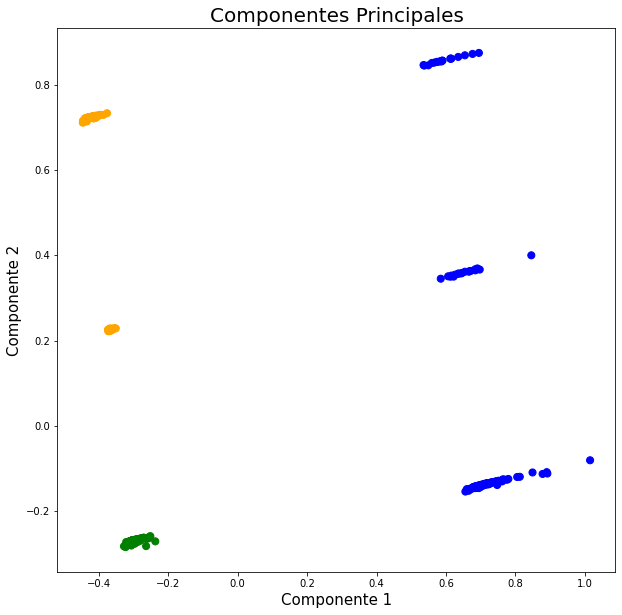

In [252]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_pd.Componente_1, y = pca_nombres_pd.Componente_2, c = color_theme[pca_nombres_pd.KMeans_Clusters], s=50)
